In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
import numpy as np
import pandas as pd
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dim=(256,256)
imageShape = (dim[0],dim[1],3)
numClasses = 2
batchSize = 10
epochs = 1
folderWithPics='twitter'
dirs=os.listdir('./'+folderWithPics)
clsLabels=pd.read_csv('./'+folderWithPics+'/groundTruthLabel.txt',delimiter='\t')
clsLabels.index=clsLabels.index+1
subDirPath=[('./'+folderWithPics+'/'+di) for di in dirs if('txt' not in di)]
allImagesTrainPath=[(si+'/'+ii) for si in subDirPath[:-1] for ii in os.listdir(si) if('jpg' in ii)]
allImagesTestPath=[(si+'/'+ii) for si in [subDirPath[-1]] for ii in os.listdir(si) if('jpg' in ii)]

In [24]:
train = pd.read_csv("data.csv")
train.head()

,Image,Sentiment
0,1,1.0
1,2,1.0
2,3,0.0
3,4,1.0
4,5,0.0


In [25]:
x_train = train.iloc[:, 1:].values.astype('float32')
labels = train.iloc[:, 0].values.astype('int32')

ValueError: cannot reshape array of size 1 into shape (28,28)

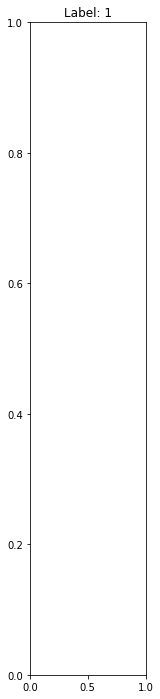

In [26]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

In [27]:
CLASSES = 10
y_train = np.zeros([labels.shape[0], CLASSES])
for i in range(labels.shape[0]):
        y_train[i][labels[i]] = 1
y_train.view(type=np.matrix)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))

Train size: 729, Test size: 81


In [29]:
INPUT_LENGHT = x_train.shape[1] # 784 
HIDDEN_UNITS = 1000

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Input Weight shape: (1, 1000)


In [30]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

In [31]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

Output weights shape: (1000, 10)


In [32]:
y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.987654
